In [127]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [128]:
bank = pd.read_csv('mapped_imputed_simulated_transaction_2024.csv')

In [129]:
bank.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00,OTHER
1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00,Kids Store
2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00,Outdoor Clothing Store


### Merchant Transactions

In [130]:
# filter for negative transactions
bank_merchant = bank[bank['Amount'] < 0]

# filter for not null in Third Party Name
bank_merchant = bank_merchant[bank_merchant['Third Party Name'].notnull()]

bank_merchant.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
495,495,355733816.0,526.00,-664.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
496,496,472213568.0,2412.00,-600.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
497,497,624500124.0,2572.00,-654.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
498,498,203466392.0,3935.66,-672.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
499,499,768271776.0,2208.00,-632.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking


### Data Pre-Processing

In [131]:
# pivot table to get sum of transactions for each Account No

bank_pivot = bank_merchant.pivot_table(
    index='Account No',
    columns= 'group',
    values='Amount',
    aggfunc='sum'
    
)


bank_pivot.head()

group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,-513.66,-10308.0,NaN,NaN,NaN,-2200.50,NaN,NaN,-95.88,-87.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-308.99,-2394.86,NaN
104832000.0,NaN,-10332.0,-200.0,NaN,NaN,NaN,NaN,NaN,-191.88,-211.33,...,NaN,NaN,-7.31,NaN,NaN,NaN,NaN,NaN,-3619.33,NaN
105375973.0,NaN,NaN,NaN,-462.18,NaN,-639.15,NaN,-2414.01,-287.76,-134.64,...,NaN,NaN,-69.03,-12.9,NaN,NaN,NaN,-2577.30,-258.79,-2023.97
106601471.0,-148.81,NaN,NaN,-199.82,NaN,-3042.28,NaN,-33.72,-191.88,-398.88,...,NaN,NaN,-159.38,-23.9,NaN,NaN,NaN,-257.02,-1039.83,-123.03
108481285.0,-1190.93,NaN,NaN,-124.88,NaN,-2219.30,NaN,-236.04,-183.77,-64.28,...,NaN,NaN,-660.89,NaN,NaN,NaN,NaN,-1901.14,-1528.08,-362.81


In [132]:
# fill NaN with 0
bank_pivot.fillna(0, inplace=True)

# take absolute value of transactions
bank_pivot = bank_pivot.abs()

bank_pivot.head()

group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,513.66,10308.0,0.0,0.00,0.0,2200.50,0.0,0.00,95.88,87.27,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,308.99,2394.86,0.00
104832000.0,0.00,10332.0,200.0,0.00,0.0,0.00,0.0,0.00,191.88,211.33,...,0.0,0.0,7.31,0.0,0.0,0.0,0.0,0.00,3619.33,0.00
105375973.0,0.00,0.0,0.0,462.18,0.0,639.15,0.0,2414.01,287.76,134.64,...,0.0,0.0,69.03,12.9,0.0,0.0,0.0,2577.30,258.79,2023.97
106601471.0,148.81,0.0,0.0,199.82,0.0,3042.28,0.0,33.72,191.88,398.88,...,0.0,0.0,159.38,23.9,0.0,0.0,0.0,257.02,1039.83,123.03
108481285.0,1190.93,0.0,0.0,124.88,0.0,2219.30,0.0,236.04,183.77,64.28,...,0.0,0.0,660.89,0.0,0.0,0.0,0.0,1901.14,1528.08,362.81


In [133]:
# normalise values within each column

bank_pivot_norm = bank_pivot.div(bank_pivot.sum(axis=0), axis=1)    

bank_pivot_norm.head()

group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,0.001122,0.002093,0.0,0.000000,0.0,0.000961,0.0,0.000000,0.000522,0.000219,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000269,0.000823,0.000000
104832000.0,0.000000,0.002098,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.001046,0.000531,...,0.0,0.0,0.000076,0.000000,0.0,0.0,0.0,0.000000,0.001244,0.000000
105375973.0,0.000000,0.000000,0.0,0.004996,0.0,0.000279,0.0,0.014025,0.001568,0.000338,...,0.0,0.0,0.000719,0.001875,0.0,0.0,0.0,0.002244,0.000089,0.005480
106601471.0,0.000325,0.000000,0.0,0.002160,0.0,0.001329,0.0,0.000196,0.001046,0.001002,...,0.0,0.0,0.001660,0.003474,0.0,0.0,0.0,0.000224,0.000357,0.000333
108481285.0,0.002601,0.000000,0.0,0.001350,0.0,0.000969,0.0,0.001371,0.001001,0.000161,...,0.0,0.0,0.006882,0.000000,0.0,0.0,0.0,0.001655,0.000525,0.000982


### Income estimation

In [147]:
bank['Date'] = pd.to_datetime(bank['DateTime'],dayfirst=False ).dt.date
bank['Timestamp'] = pd.to_datetime(bank['DateTime']).dt.time
bank.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00,OTHER
1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00,Kids Store
2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00,Outdoor Clothing Store


In [145]:
# Just get positive transactions into the balance
print('Number of unique accounts in original bank: ', len(bank['Account No'].unique()))
bank_amount_incomings = bank[bank['Amount'] > 0]

# remove rows with non-null values in 'Third Party Name' - i.e. merchant transactions
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Third Party Name'].notnull()]

#check if there are any null values in the dataset
bank_amount_incomings.isnull().sum()

# print number of unique accounts
print('Number of unique accounts after filtering for incomings only: ', len(bank_amount_incomings['Account No'].unique()))

bank_amount_incomings.head(10)


# get account numbers who don't have any positive transactions from a Third Party Name merchant
accounts_no_incomings = bank[~bank['Account No'].isin(bank_amount_incomings['Account No'])]

print(f'No of accounts with no incoming transactions: {len(accounts_no_incomings["Account No"].unique())}')

Number of unique accounts in original bank:  976
Number of unique accounts after filtering for incomings only:  616
No of accounts with no incoming transactions: 360


C:\Users\donjo\AppData\Local\Temp\ipykernel_8864\2118816923.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incomes, shade=True)


<Axes: xlabel='Amount', ylabel='Density'>

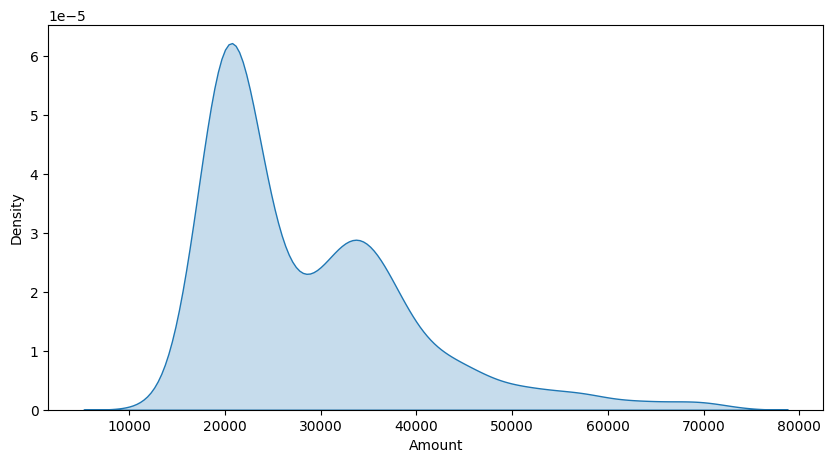

In [146]:
# drop transactions in december
bank_amount_incomings['Date'] = pd.to_datetime(bank_amount_incomings['Date'])
bank_amount_incomings_without_dec = bank_amount_incomings[~bank_amount_incomings['Date'].dt.month.isin([12])]

# group by Account No and sum the 'Amount' for each account but normalise dividing by number of transactions for each account
income_per_account = bank_amount_incomings_without_dec.groupby('Account No')['Amount'].sum()

# calculate the annual income for each account
incomes=(income_per_account/11)*12 # multiply by 12 to get annual income

# kde plot of annual incomes
plt.figure(figsize=(10, 5))
sns.kdeplot(incomes, shade=True)

In [149]:
# Join the two datasets on 'Account No'
bank_pivot_norm_income = pd.merge(bank_pivot_norm, incomes, on='Account No')

# normalise income feature as a 

### UMAP - reduced features

In [159]:

# drop features where more than 50% of the values are 0
bank_pivot_norm_dropped = bank_pivot_norm_income.loc[:, (bank_pivot_norm_income != 0).mean() > .2]


print(f'Shape of average spend dataset after dropping features',bank_pivot_norm_dropped.shape)

bank_pivot_norm_dropped.head()

Shape of average spend dataset after dropping features (616, 21)


,Arts and Crafts Store,Banking,Books and Stationary,Café,Clothing Store,Department Store,Entertainment,Food Delivery,Game Subscriptions,Gaming Store,...,Knitting Store,Martial Arts School,Online Shopping,Outdoor Clothing Store,Pharmacy,Pub,Sports Store,Supermarket,Tayloring Shop,Amount
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,0.001122,0.002093,0.000000,0.0,0.000961,0.000000,0.000522,0.000219,0.000000,0.000000,...,0.0,0.005220,0.000000,0.000049,0.000000,0.000000,0.000269,0.000823,0.000000,18510.0
104832000.0,0.000000,0.002098,0.000000,0.0,0.000000,0.000000,0.001046,0.000531,0.001198,0.003410,...,0.0,0.003981,0.000006,0.000000,0.000076,0.000000,0.000000,0.001244,0.000000,20100.0
106601471.0,0.000325,0.000000,0.002160,0.0,0.001329,0.000196,0.001046,0.001002,0.001747,0.002261,...,0.0,0.000000,0.002499,0.000994,0.001660,0.003474,0.000224,0.000357,0.000333,20100.0
108481285.0,0.002601,0.000000,0.001350,0.0,0.000969,0.001371,0.001001,0.000161,0.000000,0.000000,...,0.0,0.000000,0.005729,0.001963,0.006882,0.000000,0.001655,0.000525,0.000982,19008.0
108563213.0,0.000476,0.000000,0.000216,0.0,0.002304,0.002076,0.001568,0.000209,0.001569,0.000287,...,0.0,0.000000,0.006665,0.000756,0.003944,0.000000,0.001693,0.001624,0.001690,44988.0


In [181]:
np.random.seed(120)

# convert to numpy array
bank_umap_2 = bank_pivot_norm_dropped.to_numpy()
print(f'Shape of average spend dataset',bank_umap_2.shape)

# apply UMAP
umap_reducer = umap.UMAP(
    n_neighbors=15, #400
    min_dist=0.4, # 0.05
    metric = 'euclidean' 
)
embedding = umap_reducer.fit_transform(bank_umap_2)

Shape of average spend dataset (616, 21)


c:\Users\donjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


C:\Users\donjo\AppData\Local\Temp\ipykernel_8864\2837088216.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


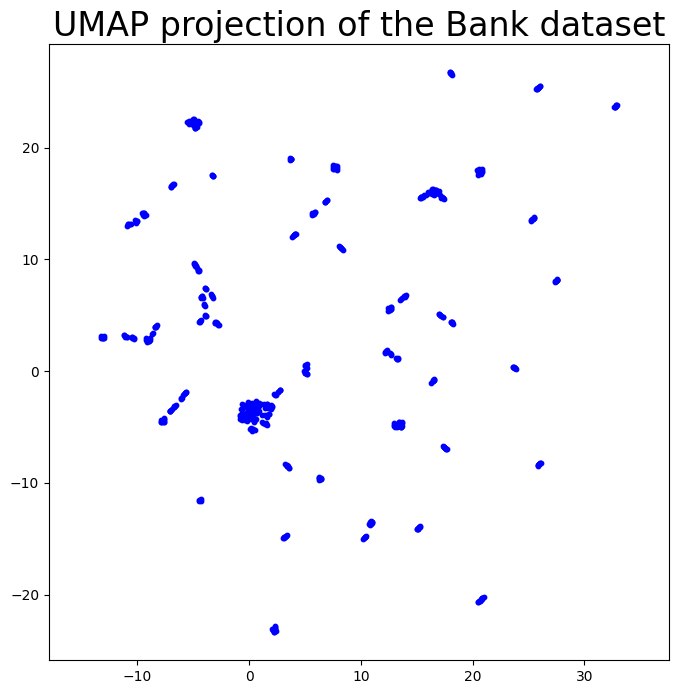

In [182]:
# plot UMAP embedding
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c='blue',
    cmap='Spectral',
    s=10
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Bank dataset', fontsize=24);

In [183]:
# cluster with hdbscan
from sklearn.cluster import HDBSCAN
hdb = HDBSCAN(
    min_samples=1,
    min_cluster_size=50,
)


# fit the clusterer
hdb_clusters = hdb.fit_predict(embedding)

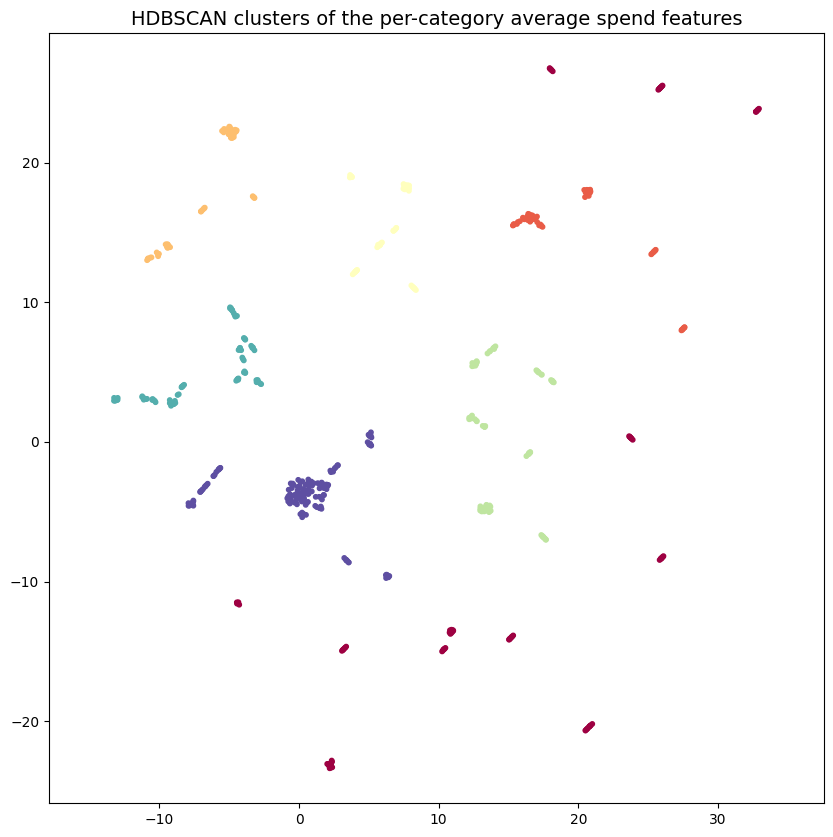

Silhouette score for clusters:  0.39680415


In [184]:
# plot HDBSCAN
plt.figure(figsize=(10, 10))

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=hdb_clusters,
    cmap='Spectral',
    s=10
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN clusters of the per-category average spend features', fontsize=14);
plt.show()

# get silhouette score
from sklearn.metrics import silhouette_score
print(f'Silhouette score for clusters: ',silhouette_score(embedding, hdb_clusters))

In [185]:
# print numebrof clusters
print(f'Number of clusters: ',len(set(hdb_clusters)))

Number of clusters:  7


In [186]:
cluster_analysis = bank_pivot_norm_dropped.copy()

cluster_analysis['cluster'] = hdb_clusters

# get mean values for each cluster
cluster_averages = cluster_analysis.groupby('cluster').mean()
cluster_averages = cluster_averages.T

# plot cluster means
"""plt.figure(figsize=(20, 10))
plt.plot(cluster_averages)
plt.legend(cluster_averages.columns)
plt.title('Cluster averages of per-category average spend features', fontsize=14)
plt.xticks(rotation=45)
plt.show() """


"plt.figure(figsize=(20, 10))\nplt.plot(cluster_averages)\nplt.legend(cluster_averages.columns)\nplt.title('Cluster averages of per-category average spend features', fontsize=14)\nplt.xticks(rotation=45)\nplt.show() "

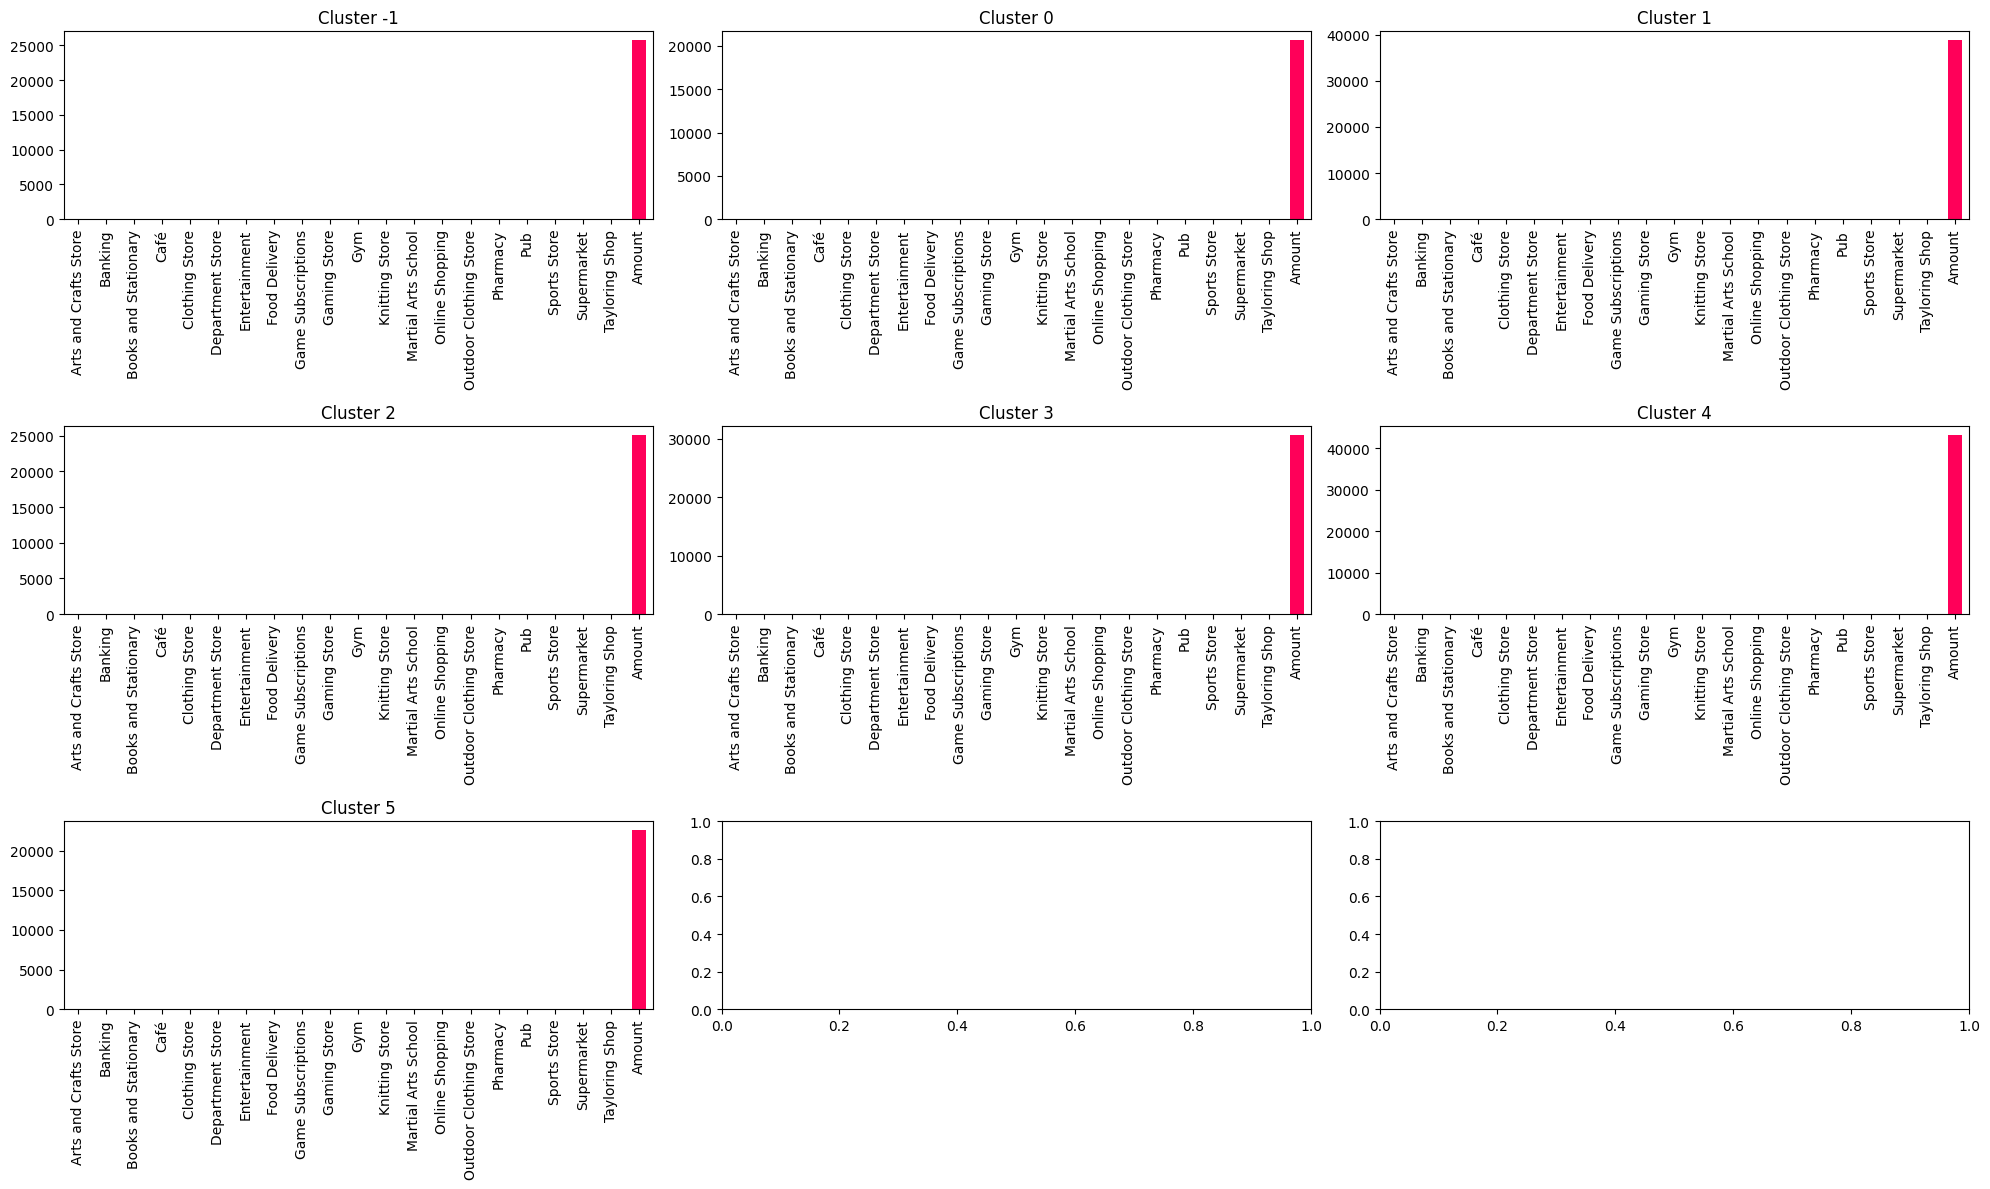

In [187]:
# bar plot of cluster averages subplots for each cluster - 6 clusters
fig, axs = plt.subplots(3, 3, figsize=(20, 12))

for i in range(cluster_averages.shape[1]):  # Change this line  # Change this line
    ax = axs[i//3, i%3]
    # Generate a color palette for each bar in the subplot
    colors = sns.color_palette('hsv', len(cluster_averages.iloc[:, i]))   
    cluster_averages.iloc[:, i].plot(kind='bar', ax=ax, color = colors)
    ax.set_title(f'Cluster {i-1}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()

### Including salary as a feature